# **Analyzing Used Car Data to Improve Sales and Predict Pricing**


### **Team Members**

* Weijia Suo
* Jen Horita
* Linh To
* Urvashi Tripathi
* Fusu Luo

### **General Summary**

Getting the price right till today remains one of the greatest challenges that plague businesses across industries and functions. 

Matters only get more complex when we enter the used goods market. An layers of the consumer's perceived value of the object gets added to the price equation and interacts with every predictor variable. 

Through this analysis, we aim to understand the levers of the used car market, both from a selling as well as buying perspective. 

Some of the factors we look the analyze are the condition, color, ododmeter reading, state of sale, manufacturer, cylinder configuration and type of drive. We visualize their variation with the car price and build insight into the workings of this industry. 


### **Project Objective**

The analysis and prediction of used car prices and its impact factors such as color, odometer reading, state of sale, manufacturer, cylinder configuration and type of drive. We visualize their variation with the car price and build insight into the workings of this industry. 

Through this project, we hope to help consumers buy high-quality cars at a reasonable price and help Craigslist.com platform to properly allocate enterprise inventory resources.

### **Real world Impact**

The global used car market was valued at USD 1,332.2 B in 2019 and is expected to grow at a compound annual growth rate (CAGR) of 5.5% (2020 to 2027). The used car shipment was recorded at 102.8 million units in 2019.

This market has shown growth potential over the past decade. Factors - consumers' growing interest in used cars vs. new cars, price competitiveness, growing dealership networks - that are contributing to this growth are also adding to the complexity in the industry. 

In this climate, both consumers and sellers can gain significantly by making data driven decisions such as the right price to pay for a certain kind of vehicle for the consumer and the right inventory to stock to maximize profits for sellers. 

Our analysis targets this problem and looks to analysis used car prices both from a consumer as well as a seller's lens. 



### **Contents**

Data preparation
  * Piping data from Drive to notebook
  * Select important variables
  * Process missing values
  * Remove outliers
  * Create custom variables

Exploratory data analysis
  *   Statistical description on overall dataset
  *   Correlation between each variables
  *   Wordcloud on customer comment

Business analysis - based on correlation of variables and word cloud results. 
  * Companies point of view
    * Price Exploration
    * Average price over the years
    * Drive Exploration
    * Color Exploration
    * Cylinder Exploration 
  * Customer point of view
    * Prive over odometer
    * Manufacurers selection
    * Cylinder selection

### About Dataset


* Raw Dataset: [Used Cars dataset](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)
* Data Source: [Craigslist.org](https://www.craigslist.org) (*The data was generated by the web crawler.*)

## **Data Preparation**

In [ ]:
# imports 
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Mounting Google Drive locally
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import data and test
pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicles.csv").head()

id  ... posting_date
0  7222695916  ...          NaN
1  7218891961  ...          NaN
2  7221797935  ...          NaN
3  7222270760  ...          NaN
4  7210384030  ...          NaN

[5 rows x 26 columns]

### **Select important variables**

In [ ]:
# Select useful column and store in google shared drive.
drive.mount('/content/gdrive', force_remount=True)
vehicle_dataset = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicles.csv")
output = vehicle_dataset[['region', 'price', 'year', 'manufacturer', 'model', 
                          'fuel', 'odometer', 'title_status', 'transmission', 
                          'condition', 'cylinders','VIN', 'drive', 'size', 'type', 
                          'paint_color', 'state', 'lat', 'long', 'posting_date']]
output.to_csv('gdrive/Shared drives/BA780 Team2/datasets/vehicle.csv', index=False)

Mounted at /content/gdrive


In [ ]:
# Loaded the sorted dataset
data = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicle.csv")
data.head()

region  price  year  ... lat long posting_date
0                prescott   6000   NaN  ... NaN  NaN          NaN
1            fayetteville  11900   NaN  ... NaN  NaN          NaN
2            florida keys  21000   NaN  ... NaN  NaN          NaN
3  worcester / central MA   1500   NaN  ... NaN  NaN          NaN
4              greensboro   4900   NaN  ... NaN  NaN          NaN

[5 rows x 20 columns]

### **Missing values processing**

Through data.head(), we can see a number of missing values in the dataset. We want to know the proportion of missing value of each variable, and we use heatmap to visualize the mising value of each variable.

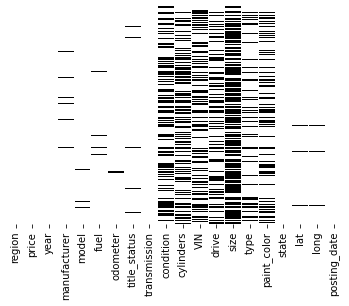

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='Greys')

According to the above figure, 'condition', 'cylinders',' VIN ', 'Drive', 'size', 'type' and 'paint_color' have a large number of missing values. As the unique ID of the car, 'VIN' will not be used in the subsequent analysis. As there are too many missing values in 'size', we also choose to delete this column. 

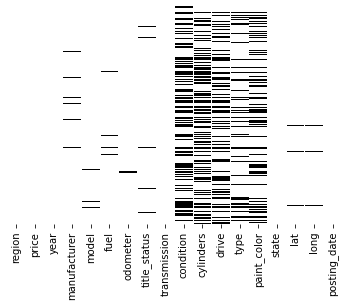

In [ ]:
# Drop columns 'size', 'VIN'
data.drop(columns=['VIN', 'size'], inplace= True)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='Greys')

After deleting two columns, there are still a large number of missing values for the remaining columns. However, considering that our data volume is large and the column is meaningful, we choose to retain it. Otherwise we will lose some key factors affecting the price. After deleting all missing values, we still have 115,435 rows data, which is sufficient for our subsequent analysis.

In [ ]:
print(data.shape)
data.dropna(inplace= True)
print(data.shape)
# Save dataset to Google Drive
data.to_csv('gdrive/Shared drives/BA780 Team2/datasets/vehicle_cleaned.csv', index=False)

(426880, 18)
(115435, 18)


In [ ]:
# Read cleaned dataset
data = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicle_cleaned.csv")
data.head()

region  price    year  ...      lat       long              posting_date
0  auburn  15000  2013.0  ...  32.5920 -85.518900  2021-05-03T14:02:03-0500
1  auburn  27990  2012.0  ...  32.5900 -85.480000  2021-05-03T13:41:25-0500
2  auburn  34590  2016.0  ...  32.5900 -85.480000  2021-05-03T12:41:33-0500
3  auburn  35000  2019.0  ...  32.6013 -85.443974  2021-05-03T12:12:59-0500
4  auburn  29990  2016.0  ...  32.5900 -85.480000  2021-05-03T11:31:14-0500

[5 rows x 18 columns]

### **Removing outliers**

**Identify outliers**

By plotting a boxplot, we can see that Buick, Ford, Gmc, Nissan and Toyota is having outliers in their data. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



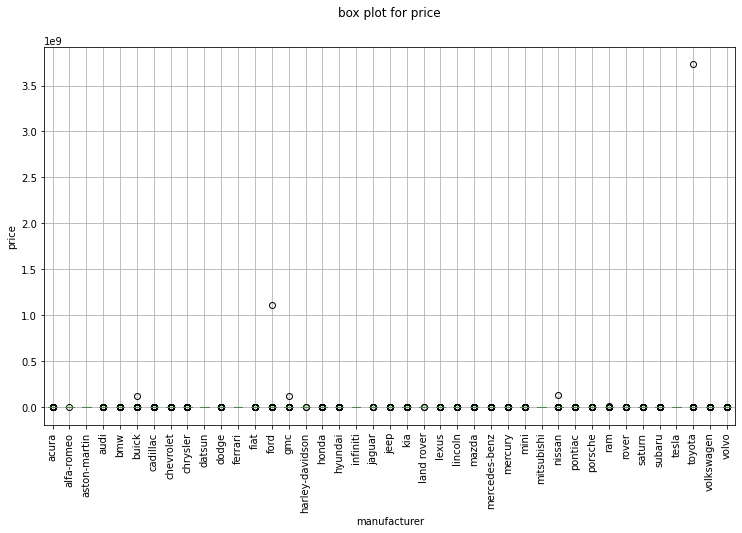

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
data.boxplot('price', 'manufacturer', ax = ax)
plt.suptitle('box plot for price')
plt.title(' ')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.show()

We choose an understandable priced for used car as a range from 10.000 dollars to 100.000 dollars.

In [ ]:
data = data[(10000 < data['price']) & (data['price'] < 100000)]

Now we plot the dataset again to see the boxplot has become much more normal, with comprehensible price distribution. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



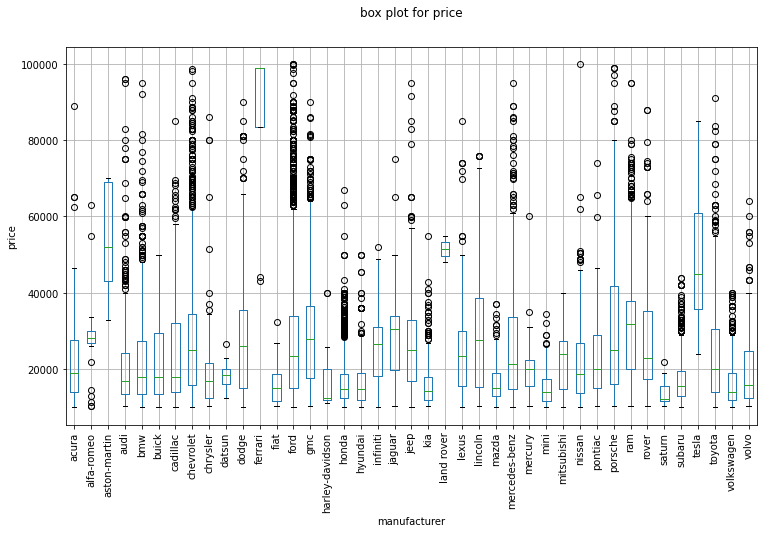

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
data.boxplot('price', 'manufacturer', ax = ax)
plt.suptitle('box plot for price')
plt.title(' ')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.show()

### **Create custom variables**

**Adding manufacturer country column**

In [ ]:
# Find unique data for manufacturer and create a column with manufacturer's country
def country(row):
  if row['manufacturer'] in ['ford', 'gmc', 'chevrolet', 'jeep', 'chrysler', 'ram','cadillac','lincoln','saturn','buick','pontiac','tesla','harley-davidson','mercury']:
    val = 'American Made'
  elif (row['manufacturer'] in ['toyota', 'nissan', 'honda', 'dodge','infiniti','mazda','lexus', 'mitsubishi','acura','subaru' ,'datsun']):
    val = 'Japanese Made'
  elif (row['manufacturer'] in ['mercedes-benz','bmw','volkswagen','porsche','audi']):
    val = 'German Made'
  elif (row['manufacturer'] in ['ferrari','fiat','alfa-romeo']):
    val = 'Italian Made'
  elif (row['manufacturer'] in ['kia','hyundai']):
    val = 'Korean Made'
  elif (row['manufacturer'] in ['land rover','jaguar']):
    val = 'Indian Made'
  elif (row['manufacturer'] in ['volvo']):
    val = 'Swedish Made'
  elif (row['manufacturer'] in ['rover','mini','aston-martin', 'morgan']):
    val = 'British Made'
  return val
data['Made'] = data.apply(country, axis=1)

**Rename the categorical variables as custom number**

In [ ]:
data_copy = data.copy()
# Print unique data for categorical variables
print('condition: ', data_copy['condition'].unique())
print('cylinders: ', data_copy['cylinders'].unique())
print('fuel: ', data_copy['fuel'].unique())
print('title_status: ', data_copy['title_status'].unique())
print('transmission: ', data_copy['transmission'].unique())
print('drive: ', data_copy['drive'].unique())
print('type: ', data_copy['type'].unique())
print('paint_color: ', data_copy['paint_color'].unique())
print('Made: ', data_copy['Made'].unique())

condition:  ['excellent' 'good' 'new' 'like new' 'fair' 'salvage']
cylinders:  ['6 cylinders' '8 cylinders' '4 cylinders' '10 cylinders' 'other'
 '3 cylinders' '5 cylinders' '12 cylinders']
fuel:  ['gas' 'diesel' 'other' 'hybrid' 'electric']
title_status:  ['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
transmission:  ['automatic' 'other' 'manual']
drive:  ['rwd' '4wd' 'fwd']
type:  ['truck' 'pickup' 'other' 'coupe' 'mini-van' 'SUV' 'sedan' 'offroad'
 'convertible' 'wagon' 'van' 'hatchback' 'bus']
paint_color:  ['black' 'silver' 'grey' 'red' 'blue' 'white' 'brown' 'yellow' 'green'
 'custom' 'orange' 'purple']
Made:  ['American Made' 'Japanese Made' 'German Made' 'Italian Made'
 'Korean Made' 'British Made' 'Swedish Made' 'Indian Made']


In [ ]:
condition = {'new': 6, 'like new': 5, 'excellent': 4, 'good': 3, 'fair': 2, 'salvage': 1}
data_copy['condition'] = data_copy['condition'].replace(condition)
df = pd.DataFrame(list(condition.items()),columns = ['condition','Code'])
df

condition  Code
0        new     6
1   like new     5
2  excellent     4
3       good     3
4       fair     2
5    salvage     1

In [ ]:
cylinders = {'8 cylinders': 8, '6 cylinders': 6, '4 cylinders': 4, '5 cylinders': 5, 'other': 0, '3 cylinders': 3, '10 cylinders': 10, '12 cylinders':12}
data_copy['cylinders'] = data_copy['cylinders'].replace(cylinders)
df = pd.DataFrame(list(cylinders.items()),columns = ['cylinders','Code'])
df

cylinders  Code
0   8 cylinders     8
1   6 cylinders     6
2   4 cylinders     4
3   5 cylinders     5
4         other     0
5   3 cylinders     3
6  10 cylinders    10
7  12 cylinders    12

In [ ]:
fuel = {'electric': 4, 'hybrid': 3, 'gas': 2, 'diesel': 1, 'other': 0}
data_copy['fuel'] = data_copy['fuel'].replace(fuel)
df = pd.DataFrame(list(fuel.items()),columns = ['fuel','Code'])
df

fuel  Code
0  electric     4
1    hybrid     3
2       gas     2
3    diesel     1
4     other     0

In [ ]:
title_status = {'clean': 6, 'rebuilt': 5, 'salvage': 4, 'missing': 3, 'lien': 2, 'parts only': 1}
data_copy['title_status'] = data_copy['title_status'].replace(title_status)
df = pd.DataFrame(list(title_status.items()),columns = ['title_status','Code'])
df

title_status  Code
0        clean     6
1      rebuilt     5
2      salvage     4
3      missing     3
4         lien     2
5   parts only     1

In [ ]:
transmission = {'automatic': 2, 'manual': 1, 'other': 0}
data_copy['transmission'] = data_copy['transmission'].replace({'automatic': 2, 'manual': 1, 'other': 0})
df = pd.DataFrame(list(transmission.items()),columns = ['transmission','Code'])
df

transmission  Code
0    automatic     2
1       manual     1
2        other     0

In [ ]:
drive = {'4wd': 3, 'rwd': 2, 'fwd': 1}
data_copy['drive'] = data_copy['drive'].replace(drive)
df = pd.DataFrame(list(drive.items()),columns = ['drive','Code'])
df

drive  Code
0   4wd     3
1   rwd     2
2   fwd     1

In [ ]:
type = {'truck': 12, 'pickup': 11, 'coupe': 10, 'mini-van': 9, 'SUV': 8, 'sedan': 7, 'offroad': 6, 'van': 5, 'convertible': 4, 'hatchback': 3, 'wagon': 2, 'bus': 1, 'other': 0}
data_copy['type'] = data_copy['type'].replace(type)
df = pd.DataFrame(list(type.items()),columns = ['type','Code'])
df

type  Code
0         truck    12
1        pickup    11
2         coupe    10
3      mini-van     9
4           SUV     8
5         sedan     7
6       offroad     6
7           van     5
8   convertible     4
9     hatchback     3
10        wagon     2
11          bus     1
12        other     0

In [ ]:
paint_color = {'black': 12, 'silver': 11, 'grey': 10, 'red': 9, 'blue': 8, 'white': 7, 'brown': 6, 'yellow': 5, 'green': 4, 'custom': 3, 'purple': 2, 'orange': 1}
data_copy['paint_color'] = data_copy['paint_color'].replace(paint_color)
df = pd.DataFrame(list(paint_color.items()),columns = ['paint_color','Code'])
df

paint_color  Code
0        black    12
1       silver    11
2         grey    10
3          red     9
4         blue     8
5        white     7
6        brown     6
7       yellow     5
8        green     4
9       custom     3
10      purple     2
11      orange     1

In [ ]:
Made = {'American Made': 8, 'Japanese Made': 7, 'Germany Made': 6, 'Italian Made': 5, 'Korean Made': 4, 'British Made': 3, 'Indian Made': 2, 'Swedish Made': 1}
data_copy['Made'] = data_copy['Made'].replace(Made)
df = pd.DataFrame(list(Made.items()),columns = ['Made','Code'])
df

Made  Code
0  American Made     8
1  Japanese Made     7
2   Germany Made     6
3   Italian Made     5
4    Korean Made     4
5   British Made     3
6    Indian Made     2
7   Swedish Made     1

### **The clean table**


Finally, we have a clean table and we will use this clean table for further data analytics.

`vehicle_ml.csv` will be used in correlation processing and machine learning.

`vehicle_cleaned.csv` will be used in data visualization.



In [ ]:
data_copy.to_csv('gdrive/Shared drives/BA780 Team2/datasets/vehicle_ml.csv', index=False)
data_copy = pd.read_csv('gdrive/Shared drives/BA780 Team2/datasets/vehicle_ml.csv')
data_copy.head()

region  price    year  ...       long              posting_date  Made
0  auburn  15000  2013.0  ... -85.518900  2021-05-03T14:02:03-0500     8
1  auburn  27990  2012.0  ... -85.480000  2021-05-03T13:41:25-0500     8
2  auburn  34590  2016.0  ... -85.480000  2021-05-03T12:41:33-0500     8
3  auburn  35000  2019.0  ... -85.443974  2021-05-03T12:12:59-0500     7
4  auburn  29990  2016.0  ... -85.480000  2021-05-03T11:31:14-0500     8

[5 rows x 19 columns]

In [ ]:
data.to_csv('gdrive/Shared drives/BA780 Team2/datasets/vehicle_cleaned.csv', index=False)
data = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicle_cleaned.csv")
data.head()

region  price    year  ...       long              posting_date           Made
0  auburn  15000  2013.0  ... -85.518900  2021-05-03T14:02:03-0500  American Made
1  auburn  27990  2012.0  ... -85.480000  2021-05-03T13:41:25-0500  American Made
2  auburn  34590  2016.0  ... -85.480000  2021-05-03T12:41:33-0500  American Made
3  auburn  35000  2019.0  ... -85.443974  2021-05-03T12:12:59-0500  Japanese Made
4  auburn  29990  2016.0  ... -85.480000  2021-05-03T11:31:14-0500  American Made

[5 rows x 19 columns]

## **Exploratory data analysis**
In the following two parts, we will analyze the data in different dimensions - Statistics & Business Problems.

We will first understand the statistical properties of the data so that we can decide which properties to analyze further.

### **Initial Analysis - Statistics**

#### **Statistical description**
In the statistical analysis section, we expected numerical data, so we chose to use the `vehicle_ml.csv` file instead.

In [ ]:
data = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicle_ml.csv")

In [ ]:
# Print description for each variables
data.describe()

price          year  ...           lat          long
count  59989.000000  59989.000000  ...  59989.000000  59989.000000
mean   24607.909083   2012.192585  ...     38.486827    -92.650564
std    12004.580604      9.972958  ...      5.776469     17.578955
min    10020.000000   1900.000000  ...    -81.838232   -159.719900
25%    14900.000000   2011.000000  ...     34.935000   -103.717900
50%    21950.000000   2015.000000  ...     39.055400    -86.634478
75%    32200.000000   2017.000000  ...     42.404100    -80.278473
max    99999.000000   2022.000000  ...     73.325010    139.691700

[8 rows x 13 columns]

From the above table, we can get some interesting results:
* **Price**: The average price of a car on this platform is $24,600
* **Year**: The average year of used car on this platform is 2012
* **Fuel Type**: On this platform, the average fuel type is 1.87, which is between diesel and gas and close to gas
* **Odometer**: The average odometer of vehicles is 60487 miles.
* **Title_status**: Vehicles have a title_status of 5.9 and almost all titles are clean
* **Transmission**: Transmission has a value of 1.55, about evenly split between Manual and Auto
* **Condition**: The average vehicle status is between Good and Excellent, and closer to Excellent
* **Cylinders**: Cylinders had an average of 6.3, with the 6 Cylinders being the most common vehicle
* **Type**: Large vehicles such as SUVs are the most popular vehicles on the platform
* **Made**: American and Japanese made vehicle are the most popular vehicles.

#### **Correlation Between Variables**
Correlation analysis is very meaningful to us and can help us select appropriate variables for exploration in business problem.

In above figure, we can see that 'year', 'fuel', 'odometer', 'transmission', 'cylinders',' drive ', 'type' and 'Made' are variables that have influence on price fluctuation.



In [ ]:
data.corr()

price      year      fuel  ...  paint_color       lat      long
price         1.000000  0.189845 -0.221488  ...    -0.015687 -0.026680  0.030282
year          0.189845  1.000000 -0.002755  ...     0.124126  0.003867  0.027889
fuel         -0.221488 -0.002755  1.000000  ...     0.059338  0.013363 -0.038496
odometer     -0.201135 -0.132139 -0.051595  ...    -0.023020  0.004204 -0.026391
title_status  0.032619 -0.029916 -0.022239  ...    -0.006388 -0.017047  0.013671
transmission -0.331418 -0.116013  0.052831  ...    -0.021872  0.093544 -0.138929
condition    -0.075689 -0.015840  0.119535  ...     0.026443  0.002702 -0.106107
cylinders     0.323408 -0.209451 -0.184885  ...    -0.060274 -0.039585  0.093029
drive         0.233129  0.001557 -0.144181  ...     0.014999  0.157868  0.067188
type          0.151558 -0.032472 -0.167953  ...    -0.057390  0.007754  0.010963
paint_color  -0.015687  0.124126  0.059338  ...     1.000000  0.016283  0.003216
lat          -0.026680  0.003867  0.013363  ...     0.016283  1.000000 -0.080925
long          0.030282  0.027889 -0.038496  ...     0.003216 -0.080925  1.000000

[13 rows x 13 columns]

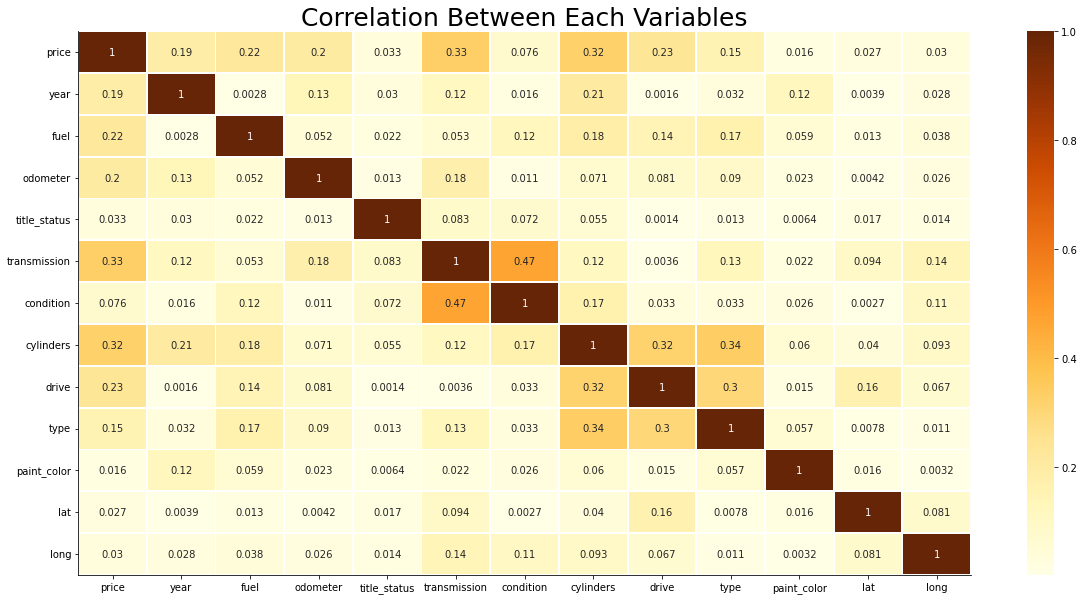

In [ ]:
plt.figure(figsize=(20, 10))
corr = data.corr().abs()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.8, cmap="YlOrBr", annot=True)
plt.title('Correlation Between Each Variables', fontsize=25)
sns.despine();

#### **Wordcloud based on customer comment**
Wordcloud is a very interesting graph where the data is drawn based on user comments. We will combine the correlation results with wordCloud results to determine the following analysis.

In above figure, the key words most concerned by users are: credit, seat, wheel, power, front, rear, milesmiles,drive, price, auto, fanancing, color, etc.

Based on these keywords, we conclude that the most concerned users are **price**, **drive**, **cylinder**, **color** and **odometer**.

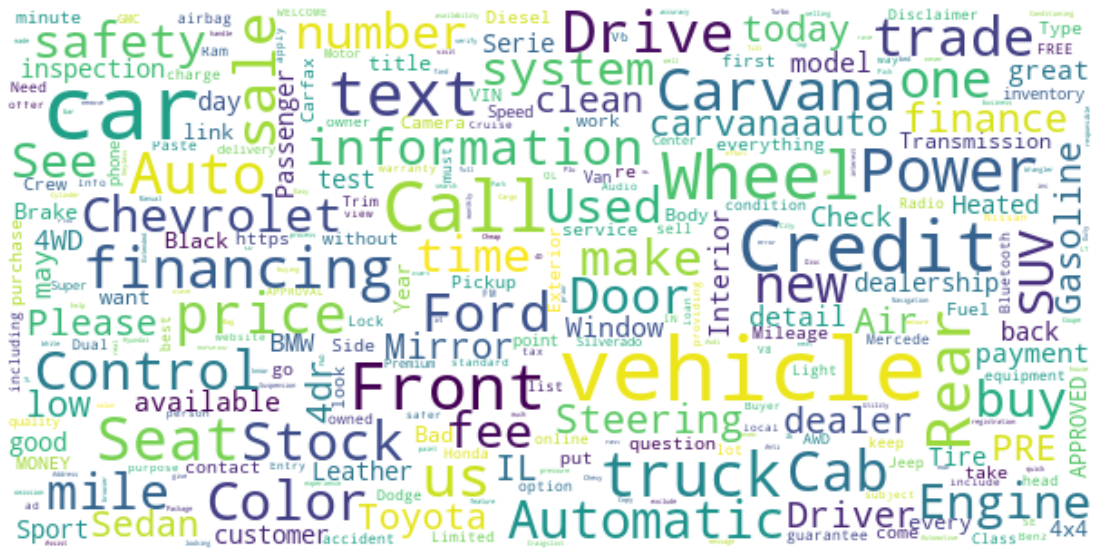

In [ ]:
# Please make sure your have at least 20GB Free RAM before run it
#words = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/words.csv")
#sns.set(rc={'figure.figsize':(20,10)})
#description = words['description']
#stop=['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
#stopwords= set(STOPWORDS)
#stopwords.update(stop)
#wordcloud = WordCloud(width=600, height=300, collocations= False, stopwords=stopwords,max_font_size=50, max_words=300, background_color="white").generate(' '.join(str(t) for t in description))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

### **Business Problem**

Through this analysis, we look to provide two points of view. The first one is that of the companies that deal in used cars and the second is that of the consumer who looks to purchase a used car 

We have selected variables of value for each category and look to understand their individual correlation with the price and popularity of a used car

***What are we solving for?***

- I am company X and I'm in the business of used cars. 
  * **How do I optimize my inventory purchase to maximize the selling price of my cars?** 

- I just moved to a new city for college, I am budget conscious and need a used car to drive around.
  * **What kind of car should I buy and what is the right price to pay for the car I buy ?**

#### **Companies point of view**

Used-car companies CEOs will be most interested in seeing what types of cars will sell with the highest price, or being the most popular sale. In this portion, we speculate that car price will vary according to manufacturers, drive and color.

- Overall, we see that Ferrari and Jaguar are the most expensive cars and Volvos and Rovers have the lowest average sale price. 

- The average price over time has not changed significantly but there are many more high priced cars in the past decade than before, pointing to a growing demand for expensive used cars

- The average price is lowest for fwd drive type
 
- Red and white cars seem to bag the highest prices, but overall price variation across colors is low. The cars most sold are either white or black. This could also point to a larger number of cars being white/black
 
 
- Our data shows us that the higher the number of cylinders the car the greater price the car sees. There is a positive correlation between price and number of cylinders.


##### **Price Exploration**


In this section, we analyze the variation in price and sales popularity based on some predictors with the overall goal of accessing which predictors are most impactful. 

The variables we consider in this section are the color of the car, its manufacturer, time of sale and cylinders in the cars. We have selected these two since companies can then identify and invest in cars that are most likely to sell and bring them a great price

In [ ]:
data = pd.read_csv("gdrive/Shared drives/BA780 Team2/datasets/vehicle_cleaned.csv")

###### **Average price by manufacturer and its fuel type**

Most of the top 10 most expensive manufacturers by average tend to have either gas or electric engines. 

In [ ]:
# average price by Manufacturer, and its fuel type
data.groupby(['manufacturer','fuel']).agg({'price' : 'mean'}).sort_values(by='price', ascending=False).head(10).reset_index('fuel')

fuel         price
manufacturer                        
ferrari            gas  83346.111111
jaguar        electric  65000.000000
aston-martin       gas  53367.000000
rover            other  52886.000000
land rover         gas  51497.500000
bmw              other  50995.000000
tesla         electric  49134.358974
cadillac         other  43914.162162
volvo         electric  43470.000000
rover           diesel  42212.631579

 **Average price by manufacturer**

This plot shows the top 10 manufacturers in terms of average price. From this, we can see which manufacturers have used cars that sell at the highest value.

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text major ticklabel objects>)

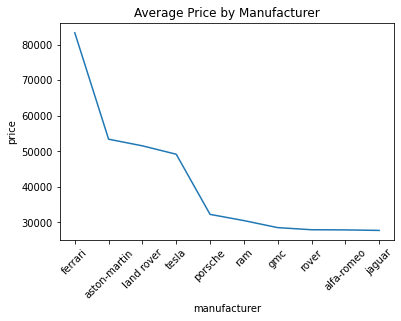

In [ ]:
# scatterplot of average price by manufacturer
top10_man = data.groupby('manufacturer').agg({'price': 'mean'}).sort_values(by='price', ascending=False).head(10).reset_index()
man_df = pd.DataFrame(top10_man)
top10_man_list = list(top10_man['manufacturer'])
top_man = sns.lineplot(x='manufacturer', y='price', data=man_df).set(title='Average Price by Manufacturer')
plt.xticks(top10_man_list)
plt.xticks(rotation=45)

###### **Average price over the state** 
Next, we want to know whether the prices of different regions are different. This graph suprised to us which we didn't know that before. We can find that the average price of used cars in the west coast is generally lower than the average price of used cars in the east coast. This finding is of great significance to used-car companies, because they can know the average price of cars in the east coast and west coast, so as to formulate appropriate pricing strategies.


In [ ]:
fig = go.Figure(data = go.Choropleth(
    locations=data['state'].str.upper(),
    z=data['price'],
    locationmode='USA-states',
    colorscale='YlOrBr',
    colorbar_title="Avg Price",
    hovertext=data['state'],
), layout=dict(title = 'Average Price by States'))

fig.update_layout(
    geo_scope = 'usa'
)

fig.show()

Next, we suspect that the factor affecting prices is inventory. By mapping the number of vehicles in the database, it can be seen that vehicle inventory is slightly higher in the west coast than in the east coast, so inventory is a factor influencing prices.

In [ ]:
mapcount = data.groupby('state', dropna=False)['state'].count().reset_index(name="count")
fig = go.Figure(data = go.Choropleth(
    locations=mapcount['state'].str.upper(),
    z=mapcount['count'],
    locationmode='USA-states',
    colorscale='YlOrBr',
    colorbar_title="Total",
    hovertext=data['state'],
), layout=dict(title = 'Total Vehicles by States'))

fig.update_layout(
    geo_scope = 'usa'
)

fig.show()

In addition, the income and prices of the west coast and the east coast are searched on Google. The prices and incomes of the east coast are generally higher than those of the west coast.

###### **Fuel usage shift over time**

While Gasoline remains the most favoured fuel, the usage of diesel has significantly reduced in usage and electric has increased 

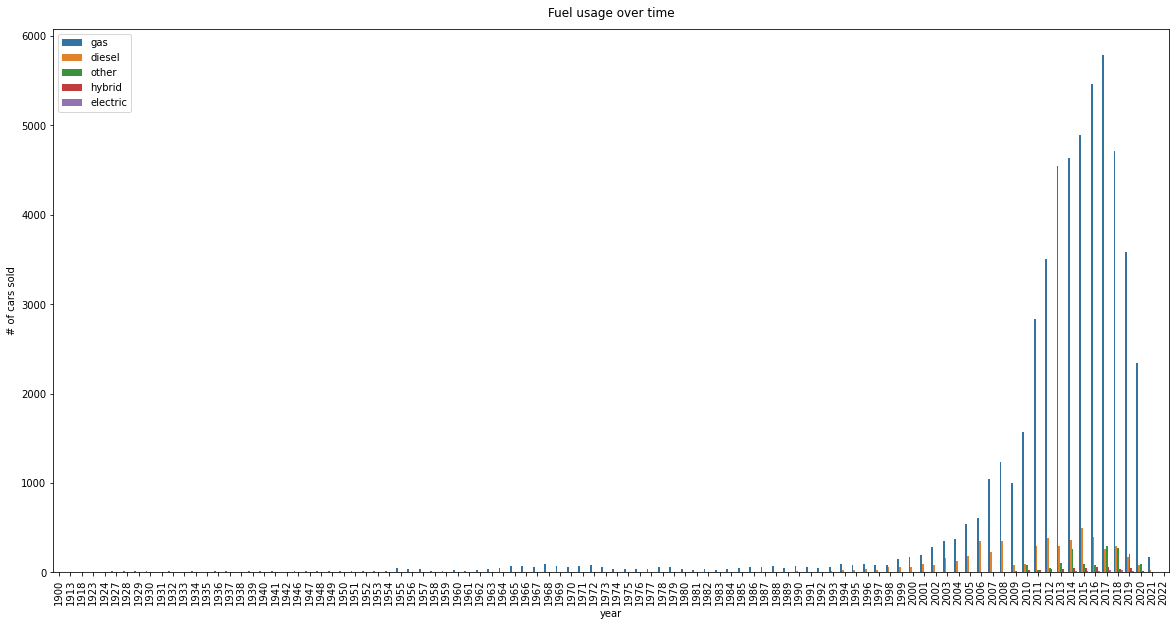

In [ ]:
z = plt.subplots(figsize=(20,10))
z = sns.countplot(x=data.year.astype(int), hue="fuel", data=data, orient = 'v')
z.set_title('Fuel usage over time', pad=12)
z.set_ylabel('# of cars sold')
plt.legend(loc='upper left')

plt.xticks(rotation=90);

###### **Average price over the years** 
Prices were initially higher in the beginning of the dataset. However, they decreased slightly and remained consistent until the last decade, where they began to increase. 



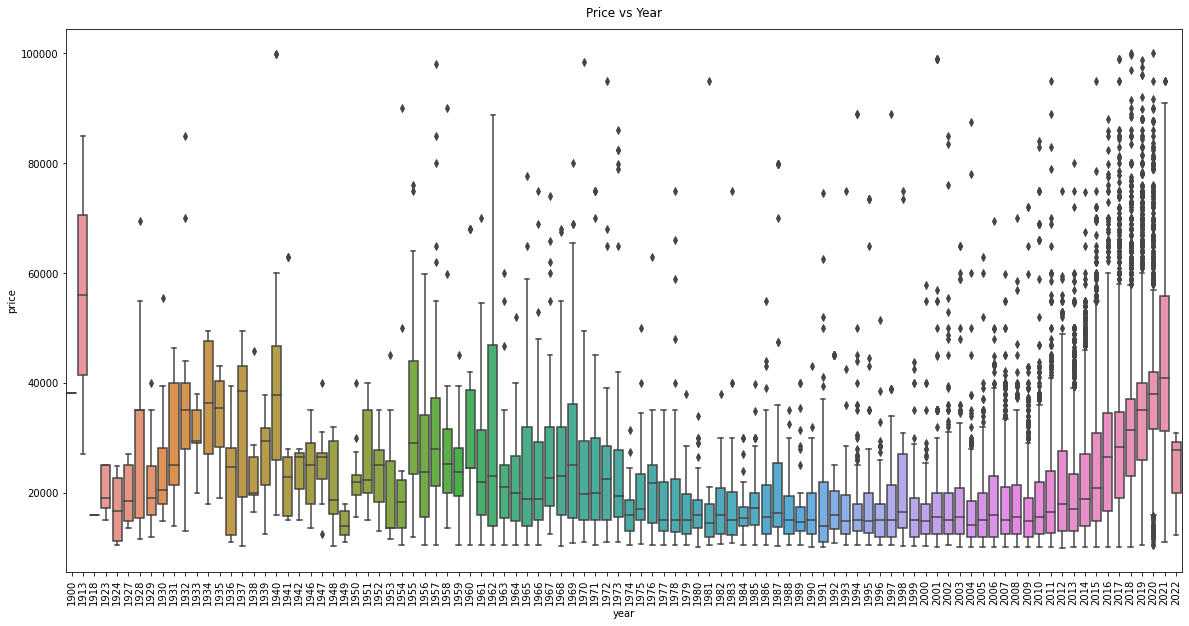

In [ ]:

f, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Price vs Year', pad=12)
fig = sns.boxplot(x=data.year.astype(int), y='price', data=data)
plt.xticks(rotation=90);

We looked at the GDP of the 1990s and the GDP of today, and we found that this price increase is closely related to changes in GDP.

###### **The variation of price of used cars** 

A majority of used cars have prices ranging from 10K to 40K and a price between 10k and 20k is most prevalent

The limit of prices has been set to remove outliers as 75 percentile of the data lies within the interval picked

''

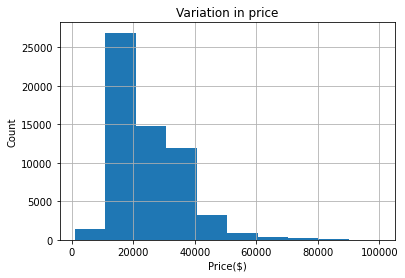

In [ ]:
# The variation of price of used cars 
# The limit of prices has been set to remove outliers as 75 percentile of the data lies within the interval picked
l = pd.to_numeric(data['price']).hist(range=[1000,100000],histtype = 'barstacked')
plt.title('Variation in price')
l.set_xlabel('Price($)')
l.set_ylabel('Count')
;

###### **The variation in price with miles run by the car**

At lower odometer readings, the drive type and price do not seem to be correlated. However, Rwd is the only type of drive prevalent at high odometer readings.



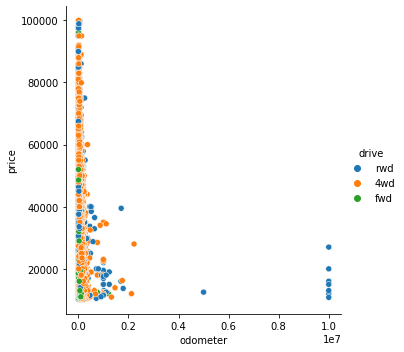

In [ ]:
m = sns.relplot(x='odometer',y = 'price' , kind='scatter', data=data, hue = 'drive')

##### Drive Exploration

Our analysis shows that cars with FWD have the lowest median price, whereas cars with 4-wheel drive have the highest. Some interesting results can be seen from box plot. For example, outliner values of FWD are generally small and scattered, while outliner values of RWD and 4WD are generally concentrated and high.

This means that used car companies have fewer luxury vehicles in their inventory on FWD and more luxury vehicles on RWD and 4WD. If customers want to buy luxury vehicles, they can recommend 4WD and RWD first. If customers are more price conscious, they can recommend FWD vehicles first.

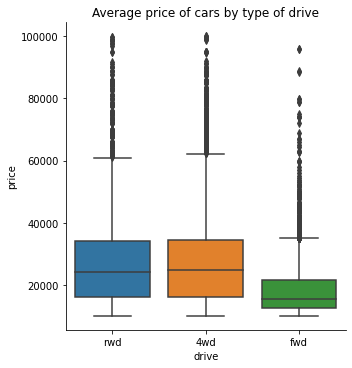

In [ ]:
avg_price_drive = data.groupby("drive")['price'].mean()

sns.catplot(x = 'drive', y = 'price', kind = 'box', data = data).set(title='Average price of cars by type of drive');

To add to the analysis from the plot above, this graph shows that there is the most variation in price for cars with FWD. The second chart confirms our view by showing that FWD has a large inventory in the low price range, while RWD and 4WD have relatively high inventory prices.

Text(0.5, 0, 'Drive')

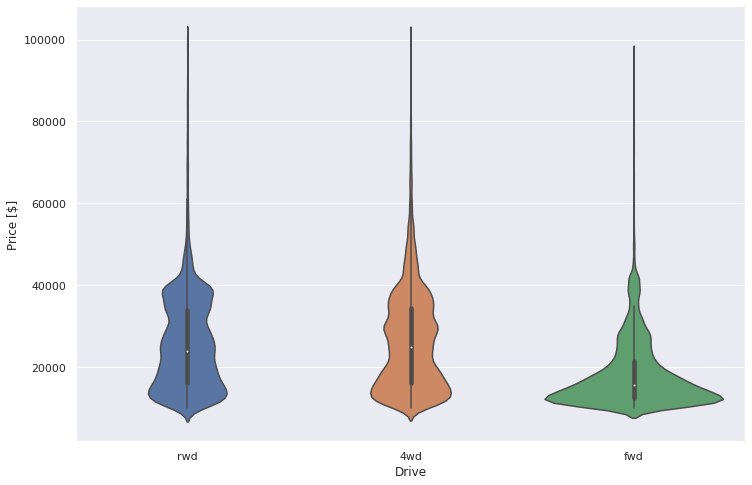

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.violinplot(y = 'price',data=data, x='drive')
plt.ylabel('Price [$]')
plt.xlabel('Drive')

##### **Color Exploration with price**

Our analysis showed that their doesn't seem to be a correlation between car price and its color - meaning that the color of the car does not suggest a higher or lower price than others. 

However, we did find that the most popular color for cars sold are white, black, silver, and red. 


###### **Color correlation with manufacturer**

While white is the most popular colour, Ford and Chevrolet sell the most whites in the market. 

The graph below is interactive. Please feel free to filter colors or manufacturers





In [ ]:
x = data.manufacturer
y = data.paint_color

fig = go.Figure(go.Histogram2d(
        x=x,
        y=y
    ))
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59989 entries, 0 to 59988
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        59989 non-null  object 
 1   price         59989 non-null  int64  
 2   year          59989 non-null  float64
 3   manufacturer  59989 non-null  object 
 4   model         59989 non-null  object 
 5   fuel          59989 non-null  object 
 6   odometer      59989 non-null  float64
 7   title_status  59989 non-null  object 
 8   transmission  59989 non-null  object 
 9   condition     59989 non-null  object 
 10  cylinders     59989 non-null  object 
 11  drive         59989 non-null  object 
 12  type          59989 non-null  object 
 13  paint_color   59989 non-null  object 
 14  state         59989 non-null  object 
 15  lat           59989 non-null  float64
 16  long          59989 non-null  float64
 17  posting_date  59989 non-null  object 
 18  Made          59989 non-nu

In [ ]:
n = data.groupby(['state','manufacturer']).agg(['count']).rename(columns={'count': 'total_sales'})
n.reset_index(inplace=True)
n = n[['state','manufacturer','price']]
n1 = n.groupby(['state']).apply(lambda x: x.sort_values([('price', 'total_sales')], ascending = False)).reset_index(drop=True)
n1


state manufacturer       price
                        total_sales
0       ak         ford         105
1       ak    chevrolet          83
2       ak       toyota          67
3       ak          ram          47
4       ak          bmw          45
...    ...          ...         ...
1579    wy   mitsubishi           1
1580    wy       nissan           1
1581    wy      porsche           1
1582    wy       subaru           1
1583    wy          bmw           1

[1584 rows x 3 columns]

In [ ]:
plot_order = data.groupby('paint_color')['price'].mean().sort_values(ascending=False).index.values
plot_order

array(['red', 'white', 'black', 'yellow', 'orange', 'purple', 'green',
       'blue', 'silver', 'brown', 'custom', 'grey'], dtype=object)

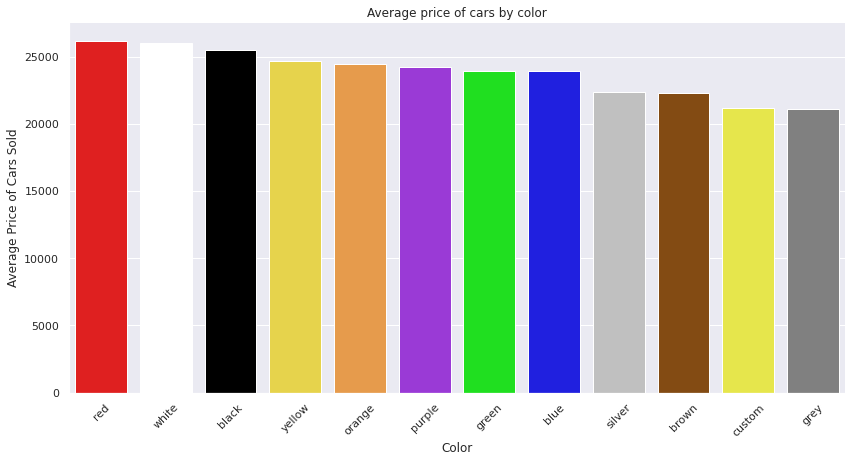

In [ ]:
colors = {'white': '#FFFFFF', 'black':'#000000' , 'silver':'#C0C0C0', 'blue': '#0000FF', 'red':'#FF0000', 'grey': '#808080', 'green': '#00FF00', 'brown':'#964B00', 'custom':'#FFFF33' , 'yellow':'#FFE633', 'orange':'#FF9C33', 'purple':'#A020F0'}
custom_palette = ['white', 'black', 'silver', 'blue', 'red', 'grey', 'green', 'brown', 'custom', 'yellow', 'orange', 'purple']
plot_order = data.groupby('paint_color')['price'].mean().sort_values(ascending=False).index.values
sns.catplot(x = 'paint_color', y = 'price', kind = 'bar', data=data, height=6, aspect=2, palette=colors, ci=None, legend_out=False, order=plot_order).set(title='Average price of cars by color')
plt.xticks(rotation=45)
sns.set(font_scale=1.5)
plt.xlabel("Color")
plt.ylabel("Average Price of Cars Sold")
sns.set_style("darkgrid");

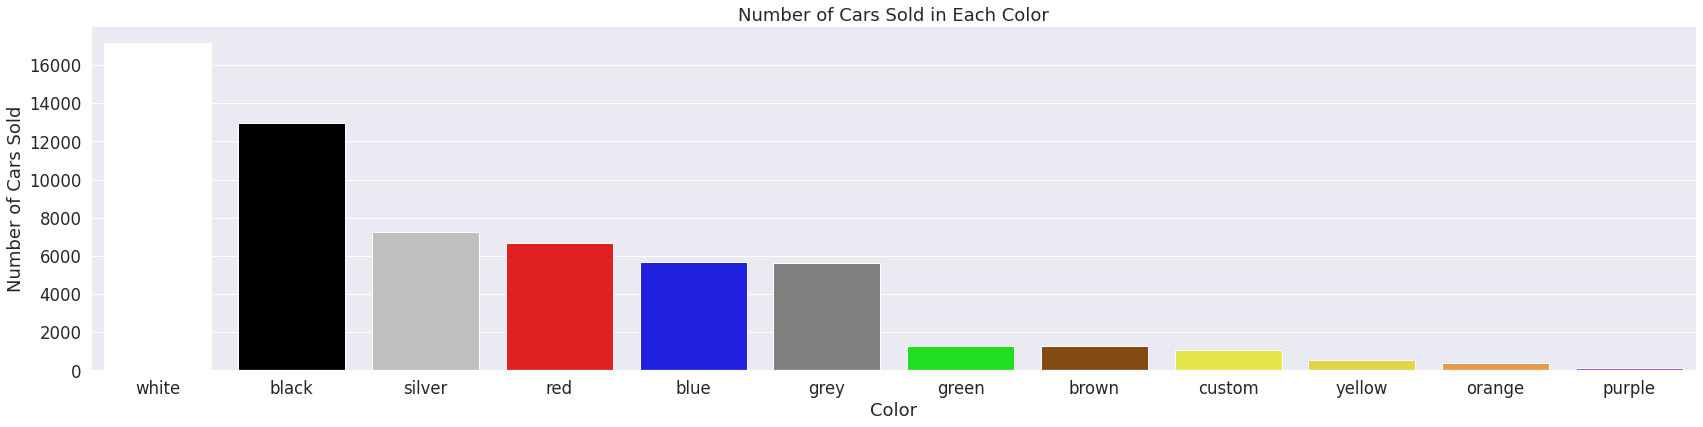

In [ ]:
# plotting the number of cars sold in each color
colors = {'white': '#FFFFFF', 'black':'#000000' , 'silver':'#C0C0C0', 'red':'#FF0000', 'blue': '#0000FF', 'grey': '#808080', 'green': '#00FF00', 'brown':'#964B00', 'custom':'#FFFF33' , 'yellow':'#FFE633', 'orange':'#FF9C33', 'purple':'#A020F0'}

custom_palette = ['white', 'black', 'silver', 'red', 'blue', 'grey', 'green', 'brown', 'custom', 'yellow', 'orange', 'purple']
sns.catplot(x='paint_color', data=data, kind='count', height=6, aspect=4, order=custom_palette, palette=colors).set(title='Number of Cars Sold in Each Color')
sns.set(font_scale=1.5)
plt.xlabel("Color")
plt.ylabel("Number of Cars Sold")
sns.set_style("darkgrid");

##### **Cylinder Exploration**

Our data shows us that the higher the number of cylinders the car the greater price the car sees. There is a positive correlation between price and number of cylinders.

In the first graph, the price was computed using the average by cylinder - with the 12-cylinder car having the highest average price. This is most likely due to the fact that cars with more power would be sold at a higher price. 

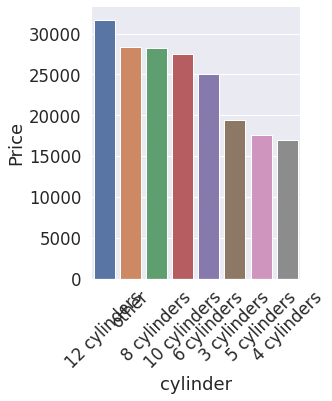

In [ ]:
plot_order = data.groupby('cylinders')['price'].mean().sort_values(ascending=False).index.values
sns.catplot(data=data, x='cylinders',  y='price',kind='bar',ci=None, legend_out=False, order=plot_order)
plt.ylabel('Price')
plt.xlabel('cylinder')
plt.xticks(rotation=45)
sns.set(font_scale=0.8)

The second graph shows the number of cylinders vs. price, with each dot representing an observation.  The difference in results from the two graphs is most lilely caused by outliers in the data.

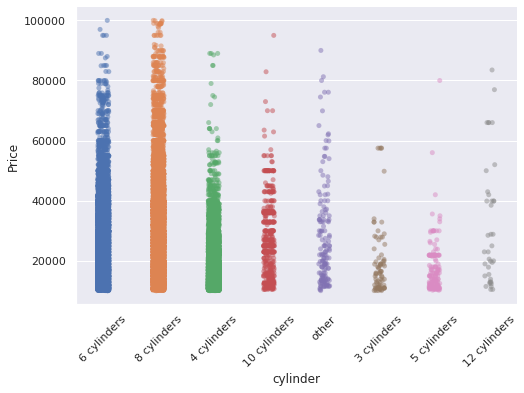

In [ ]:
sns.set(rc={'figure.figsize':(10,15)})
sns.catplot(data=data, y='price',x='cylinders',alpha=0.5, aspect=1.5)
plt.ylabel('Price')
plt.xlabel('cylinder')
plt.xticks(rotation=45)
sns.set(font_scale=1.5)

#### **Customer point of view**


Customers typically want to buy a car with less distance travelled on it and the lowest price possible. We calculate the percentage between price and distance travelled.  



##### **Radar chart with price over odometer**

In the radar chart, we can see that Italian Made cars might be the best choice if you are looking for a car at the lowest price, with the least number of miles travelled.

In [ ]:
avg_price = data.groupby("Made")['price'].mean()
avg_odometer = data.groupby("Made")['odometer'].mean()
price_odometer = pd.merge(avg_price, avg_odometer, on = 'Made')
price_odometer.reset_index(level = 0, inplace = True)

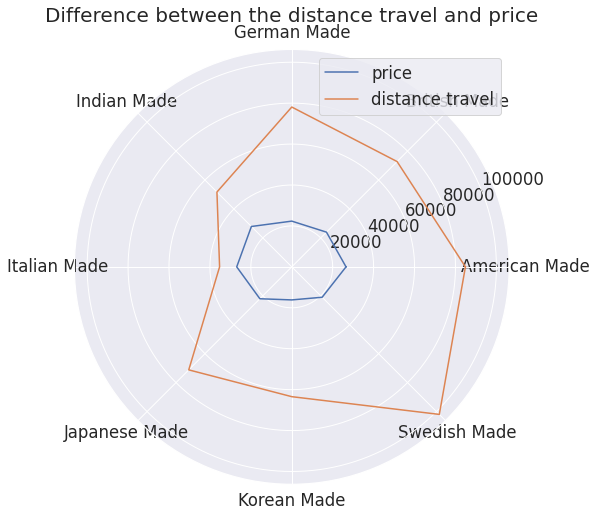

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

price_odometer


made = price_odometer['Made']

price = price_odometer['price']
odometer = price_odometer['odometer']

price = [*price , price [0]]
odometer = [*odometer, odometer[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(price))
# angles=np.linspace(0,2*np.pi,len(price), endpoint=False)


plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, price, label='price')
plt.plot(label_loc, odometer, label='distance travel')

plt.title('Difference between the distance travel and price', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=made)
# Fill area
# ax.plot(angles,price, 'o--', color='g', label='price')
# ax.fill(label_loc, price, alpha=0.1, color='g')
plt.legend()

plt.show()

##### **Manufacturers with the lowest prices**

Diving deeper into Italian made cars, we see that if we want to buy the Italian made car with the lowest average price, we should buy a fiat.

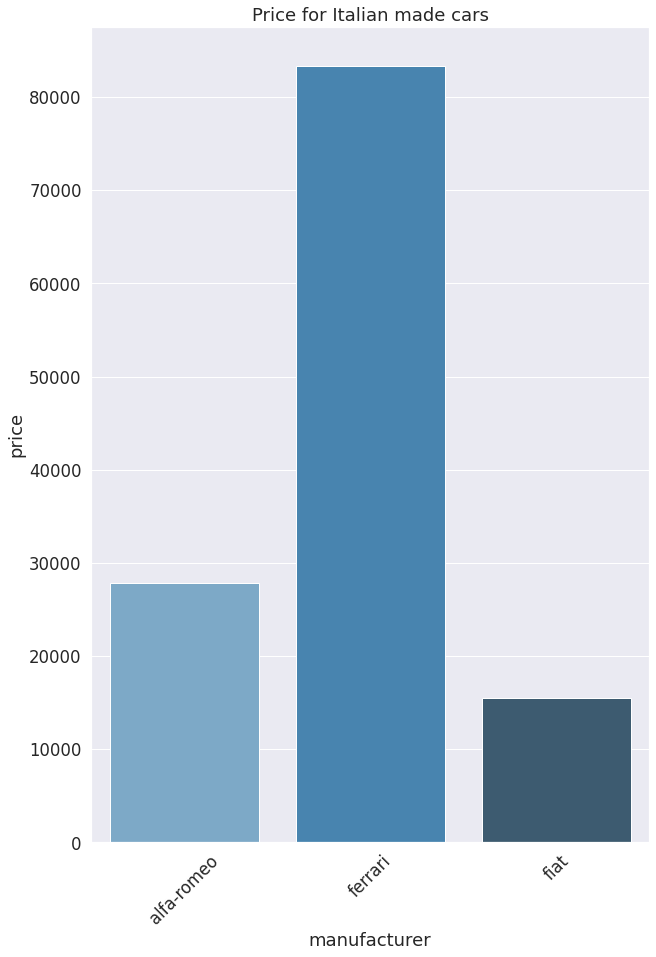

In [ ]:
Italian_made = data[data['Made'] == 'Italian Made']
Italian_made[['price', 'manufacturer']]
Italian_manufacturers = Italian_made.groupby('manufacturer')['price'].mean()
Italian_manufacturers = pd.DataFrame(Italian_manufacturers)
Italian_manufacturers.reset_index(level = 0, inplace = True)

g = sns.barplot(x = Italian_manufacturers['manufacturer'], y = Italian_manufacturers['price'], data = Italian_manufacturers, palette="Blues_d")

g.set_title('Price for Italian made cars')
plt.xticks(rotation = 45)
sns.set(rc={'figure.figsize':(2,1)})
sns.set(font_scale=1.2)
plt.show()

##### **Price in terms of number of cylinders**

In this radar chart, we see that the cars with 5 cylinders will be the best choice as it, on average, has the lowest price with the least miles travelled.

In [ ]:
avg_price = data.groupby("cylinders")['price'].mean()
avg_odometer = data.groupby("cylinders")['odometer'].mean()
price_odometer = pd.merge(avg_price, avg_odometer, on = 'cylinders')
price_odometer.reset_index(level = 0, inplace = True)

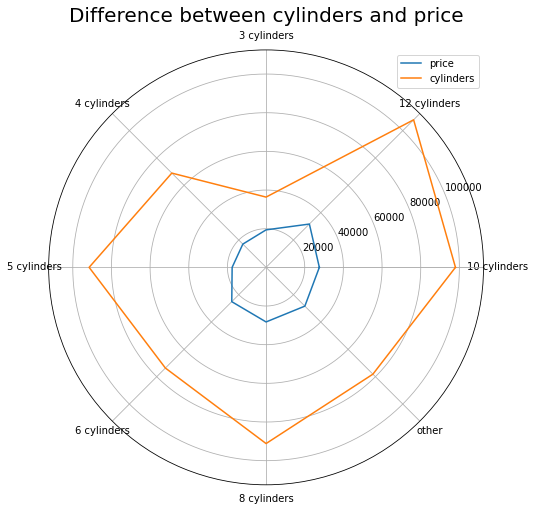

In [ ]:
price_odometer


made = price_odometer['cylinders']

price = price_odometer['price']
odometer = price_odometer['odometer']

price = [*price , price [0]]
odometer = [*odometer, odometer[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(price))
# angles=np.linspace(0,2*np.pi,len(price), endpoint=False)


plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, price, label='price')
plt.plot(label_loc, odometer, label='cylinders')

plt.title('Difference between cylinders and price', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=made)
# Fill area
# ax.plot(angles,price, 'o--', color='g', label='price')
# ax.fill(label_loc, price, alpha=0.1, color='g')
plt.legend()

plt.show()



## **Machine Learning**

### **Set up**

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import xgboost
from numpy import loadtxt
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression


In [ ]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Business summary**

For this part we are focusing on the the sellerr's point of view, we would want to make suggestions to the seller to get the right inventory to stock to maximize profits for seller. To be exact: if we import a car with this color, this brand, this cylinder, having this drive, type, and car color, how much price should the company sell.

Price prediction models will include: Linear regression, Decision tree, Random forest and Random forest with cross validation.

### **Technical summary**

- Choosing the right features:

The model would make more accurate prediction if we try to include all the variables or do some feature engineering first, but we are first building a prototype following the business sense of the seller. Chosen features will be "manufacturer", "cylinders", "drive", "type", "paint_color".

- Preprocessing data

We preprocessed categorical data using one hot encoding and labelling. Even though we mainly used the labelling dataset, we still reserve one hot encoding dataset for future machine learning models.

- Building models, fitting and give prediction

All models are built using sklearn library

- Compare between the models

In regression prediction we chose RMSE and MAE for our comparison.

- Make prediction using the best model

#### **Preprocessing data for regression prediction**

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/BA780 Team2/datasets/vehicle_cleaned.csv')
data_regression = data.loc[:, ['manufacturer', 'cylinders', 'drive', 'type', 'paint_color', 'price']]
#Copying in to 2 versions for one hot and label
ohc_reg = data_regression
label_reg = data_regression
data_regression_original = data_regression
data_regression.head()

manufacturer    cylinders drive    type paint_color  price
0         ford  6 cylinders   rwd   truck       black  15000
1          gmc  8 cylinders   4wd  pickup       black  27990
2    chevrolet  6 cylinders   4wd  pickup      silver  34590
3       toyota  6 cylinders   4wd   truck        grey  35000
4    chevrolet  6 cylinders   4wd  pickup         red  29990

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59989 entries, 0 to 59988
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        59989 non-null  object 
 1   price         59989 non-null  int64  
 2   year          59989 non-null  float64
 3   manufacturer  59989 non-null  object 
 4   model         59989 non-null  object 
 5   fuel          59989 non-null  object 
 6   odometer      59989 non-null  float64
 7   title_status  59989 non-null  object 
 8   transmission  59989 non-null  object 
 9   condition     59989 non-null  object 
 10  cylinders     59989 non-null  object 
 11  drive         59989 non-null  object 
 12  type          59989 non-null  object 
 13  paint_color   59989 non-null  object 
 14  state         59989 non-null  object 
 15  lat           59989 non-null  float64
 16  long          59989 non-null  float64
 17  posting_date  59989 non-null  object 
 18  Made          59989 non-nu

In [ ]:
data['price'].sort_values()

2556     10020
53327    10050
22505    10082
54792    10088
4012     10088
         ...  
5021     99700
8495     99888
7491     99888
17446    99990
35265    99999
Name: price, Length: 59989, dtype: int64

##### **One hot encoding**

In [ ]:
ohc_reg = pd.get_dummies(ohc_reg)

##### **Label encoding**

In [ ]:
label_reg = data_regression

le_manufacturer = LabelEncoder()
le_type = LabelEncoder()
le_cylinders = LabelEncoder()
le_paint_colors = LabelEncoder()
le_drive = LabelEncoder()

label_reg["type"] = le_type.fit_transform(label_reg['type'])
label_reg["manufacturer"] = le_manufacturer.fit_transform(label_reg['manufacturer'])
label_reg['cylinders'] = le_cylinders.fit_transform(label_reg['cylinders'])
label_reg['paint_color'] = le_paint_colors.fit_transform(label_reg['paint_color'])
label_reg['drive'] = le_drive.fit_transform(label_reg['drive'])

label_reg.head()

manufacturer  cylinders  drive  type  paint_color  price
0            13          5      2    10            0  15000
1            14          6      0     8            0  27990
2             7          5      0     8            9  34590
3            38          5      0    10            5  35000
4             7          5      0     8            8  29990

In [ ]:
X_regla = label_reg.drop('price', axis = 1)
y_regla = label_reg['price']

X_train_regla, X_test_regla, y_train_regla, y_test_regla = train_test_split(X_regla, y_regla, test_size = 0.2, random_state = 780)

#### **Linear Regression**



In [ ]:
LRmodel = LinearRegression()
LRmodel.fit(X_train_regla, y_train_regla)

#Make predictions b
ypred_linear = LRmodel.predict(X_test_regla)
ypred_linear

array([10712.86934246, 17979.69833771, 27646.4619262 , ...,
       23915.36627515, 23975.00121577, 26183.46597909])

In [ ]:
LR = X_test_regla.join(y_test_regla).reset_index()
LR.join(pd.Series(ypred_linear, name='predicted')).head()

index  manufacturer  cylinders  ...  paint_color  price     predicted
0  39746            13          0  ...            4  49990  10712.869342
1  55683            17          3  ...            1  21500  17979.698338
2  35570            13          6  ...           10  18995  27646.461926
3  35190            38          3  ...            5  12850  19119.009477
4   6390             7          6  ...           10  10902  29523.646679

[5 rows x 8 columns]

In [ ]:
print("Model coefficients:    ",LRmodel.coef_)
print("Model intercept:", LRmodel.intercept_)

Model coefficients:     [   9.6855616  3086.12987719 -967.64906097  185.42471614   58.68524042]
Model intercept: 8497.968918481138


In [ ]:
# Evaluation
MSE_LR = mean_squared_error(y_test_regla, ypred_linear)
RMSE_LR = np.sqrt(MSE_LR)
r2_LR = r2_score(y_test_regla, ypred_linear)
MAE_LR = mean_absolute_error(y_test_regla, ypred_linear)
print('The root mean squared error for linear regression is:',RMSE_LR)
print('The mean absolute error for linear regression is:', MAE_LR)
print('The R squared for linear regression is:', r2_LR)

The root mean squared error for linear regression is: 11349.936810583622
The mean absolute error for linear regression is: 8840.065391043321
The R squared for linear regression is: 0.10780806250497865


**Explanation:**

For the linear regression model with RMSE = 93, which means that on average the price prediction will be off by 93$.

R squared of 12% means that the varibility of price can be explained by the model.
R-squared is relatively low, which means the association is not terribly strong. Predictions will better than just guessing the mean, but not entirely reliable

#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train_regla,  y_train_regla.values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred_tree = dec_tree_reg.predict(X_test_regla)

In [ ]:
# Evaluation
MSE_tree = mean_squared_error(y_test_regla,y_pred_tree)
RMSE_tree = np.sqrt(MSE_tree)
MAE_tree = mean_absolute_error(y_test_regla, y_pred_tree)

print('The root mean squared error  is:',RMSE_tree)
print('The mean absolute error for decision tree is:', MAE_tree)

The root mean squared error  is: 9966.943632550378
The mean absolute error for decision tree is: 6739.6300011659505


#### **Random Forest**

In [ ]:
#Combine multiple decision trees into a forest

from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train_regla, y_train_regla.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_forest = random_forest_reg.predict(X_test_regla)

In [ ]:
# Evaluation
MSE_forest = mean_squared_error(y_test_regla,y_pred_forest)
RMSE_forest = np.sqrt(MSE_forest)
MAE_forest = mean_absolute_error(y_test_regla, y_pred_forest)

print('The root mean squared error for random forest is:',RMSE_forest)
print('The mean absolute error for decision tree is:', MAE_forest)

The root mean squared error for random forest is: 9785.433838837054
The mean absolute error for decision tree is: 6701.098888177917


Since RMSE of random forest is bigger than RMSE of decision tree, we will try tuning random forest model to see if it helps.

In [ ]:
# max_depth = [None, 2,4,6,8,10,12]
parameters = {
              'max_depth': [*range(5, 15, 1)],
              'min_samples_leaf': [1,2,3],
             'max_features':['auto', 'sqrt', 'log2'],
             'random_state':[0,1]}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
#negated MSE
gs.fit(X_train_regla, y_train_regla.values)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
  

In [ ]:
regressor = gs.best_estimator_

regressor.fit(X_train_regla, y_train_regla.values)
y_pred_forest2 = regressor.predict(X_test_regla)
RMSE_forest2 = np.sqrt(mean_squared_error(y_test_regla,y_pred_forest2))
MAE_forest2 = mean_absolute_error(y_test_regla, y_pred_forest2)
print('The root mean squared error for random forest after grid search is:',RMSE_forest2)
print('The mean absolute error for random forest after grid search is:',MAE_forest2)

The root mean squared error for random forest after grid search is: 9999.675769540172
The mean absolute error for random forest after grid search is: 6923.777227403449


The RMSE for random forest improved for a little bit after grid search. If we have time we will come back to the model to tune.

#### **Comparing between models**

In [ ]:
comparison = {'ML Models': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Random Forest w/ CV'],
              'RMSE score': [RMSE_LR, RMSE_tree, RMSE_forest, RMSE_forest2],
              'MAE score': [MAE_LR, MAE_tree, MAE_forest, MAE_forest2]}
comparison = pd.DataFrame(data=comparison)
comparison

ML Models    RMSE score    MAE score
0    Linear Regression  11349.936811  8840.065391
1        Decision Tree   9966.943633  6739.630001
2        Random Forest   9785.433839  6701.098888
3  Random Forest w/ CV   9999.675770  6923.777227

Looking at the RMSE and MAE score, we can see that Random Forest performed the best at this regression prediction problem. 

We can infer from the RMSE that on average, for every guessed price it will be off around $10.000. 

#### **Making real prediction**

Now let's suppose that the company is having a used "Ford" truck, with 8 cylinders, 4wd, and black color, we will now try to apply Random Forest model to guess the selling price. 

After running through the model, we can guess the selling price of this car as $33808.

In [ ]:
#country, edlevel, yearscode
#These are the strings that the user will put in
X = np.array([["ford", '8 cylinders', '4wd', 'truck', 'black' ]])
X

array([['ford', '8 cylinders', '4wd', 'truck', 'black']], dtype='<U11')

In [ ]:
X[:, 0] = le_manufacturer.transform(X[:,0])
X[:, 1] = le_cylinders.transform(X[:,1])
X[:, 2] = le_drive.transform(X[:,2])
X[:, 3] = le_type.transform(X[:,3])
X[:, 4] = le_paint_colors.transform(X[:,4])

X = X.astype(float)
X


array([[13.,  6.,  0., 10.,  0.]])

In [ ]:
y_pred = random_forest_reg.predict(X)
y_pred

array([33808.70998939])

## **Conclusion**

- For **used car companies** 
  - **Fuel type:** Cars with gas or electric engines tend to be higher priced and could lead to higher profit. This can be attributed to the fact that electric cars are a newer, more popular style.
  - **Price over time:** Within the last decade, prices have continued to increase, and we would assume that that trend will continue moving forward. 
  - **Cylinders:** Cars with a higher number of cylinders will be able to be sold at a higher value - as it would have more power.
  - **Drive:** In terms of drive, 4wd will have the highest median price value, and cars with fwd will have the lowest median price value. 
  - **Color:** Price does not seem to be correlated to the color of the car. But cars that are red, white, black, and silver tend to be more popular amongst consumers. 
  - **Region:** In America, the east coast shows to have higher average prices in comparison to that of the west coast. This could explained by a difference in average income and in on the different coasts. price difference also inflused by used car inventories on the east and West coasts. This could explained by a difference in average income on the different coasts. 

  The car attributes listed above would lead to higher selling value and volume, and therefore higher profits. 

- For **used car buyers** 
  - **Fuel type:** We suggest buying a car with gas engine, as it would be slightly cheaper than electric cars, while still quite popular.
  - **Manufacturer:** Italian-made cars tend to have the best price deal for the miles driven. Additionally, within the Italian-made category, Fiats tend to have the lowest average price. 
  - **Cylinders:** When thinking about the number of cylinders, the 5-cylinder car is probably the best choice because it has a lower average price, while still having a fairly large amount of power. 
  - **Drive:** Cars with fwd will be sold at a lower average price. 
  - **Color:** Color will not dictate the price of the car. However, the color of white, black, silver, and red seem to be the most popular among car buyers, which will aid in value preservation if the buyer wants to resell the car later.  

  The car attributes listed above would give the customer the best deal on a car for the paid price. 

- For **price prediction machine learning**

 - For machine learning part, our team has laid out the steps that we took to approach the business problem of price prediction.

 - It will be our opputunities to keep trying with new models to get a better results. It is also worth noting that this is a crude machine learning prototype in order to lay out steps to build models. There are still unexplored areas such as: feature engineering, CV, other ML models... which will be areas for our team to explore next.

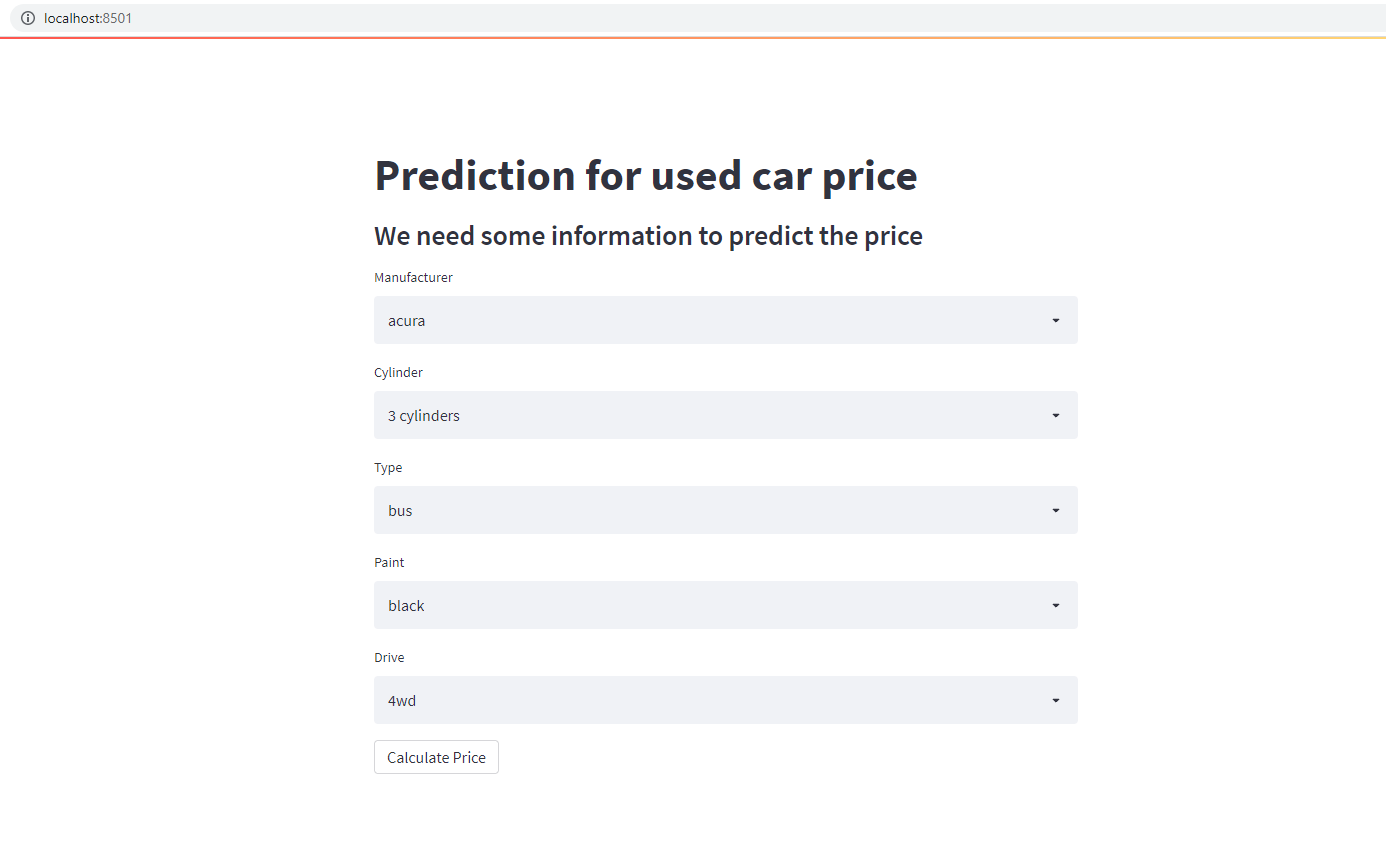

We also focused on pushing our deliverables on an app using Streamlit and it will go live on Heroku. This app will have a business summary page, a description page (for our EDA) and a prediction page (for our machine learning models).